# Enunciado
<p>
Se desarrollará un programa en Python que recorra
un laberinto (generado por el algoritmo backtraking) usando el método recursivo de recorrido en profundidad
</p>

#Intento salida y entrada aleatoria (No evaluable)

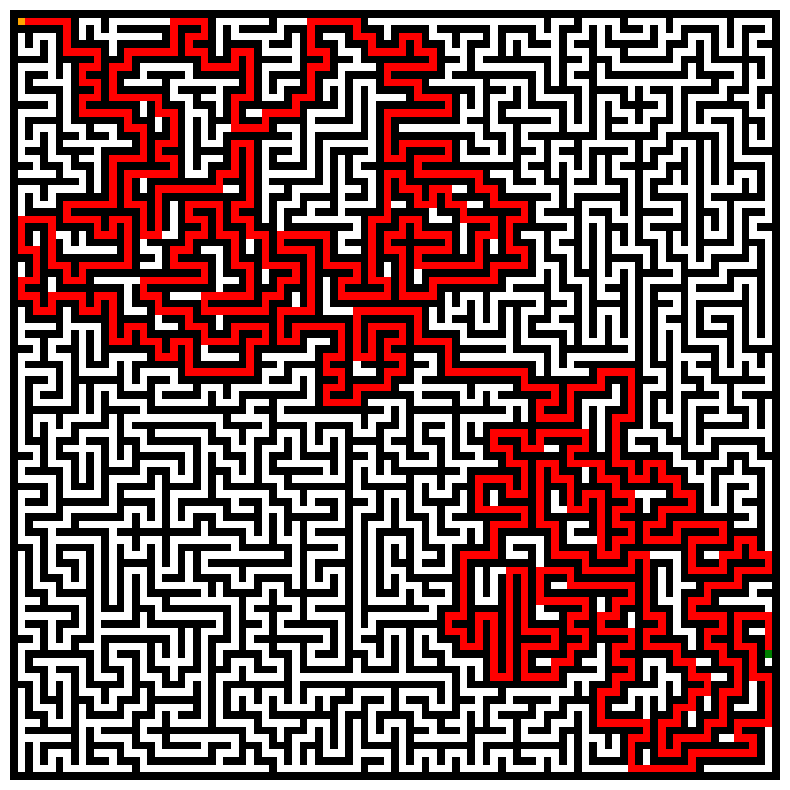

In [13]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sys


sys.setrecursionlimit(3000) # More recursion limit
MAZE_SIZE = 101 # Maze dimensions

# Direction vectors (right, down, left, up)
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Initialize the maze grid; 1 represents a wall, and 0 represents a path
# Including an outer wall
maze = np.ones((MAZE_SIZE, MAZE_SIZE), dtype=int)

def is_in_bounds(x, y):
    """ Check if a cell is within the inner boundaries, excluding the border. """
    return 1 <= x < MAZE_SIZE - 1 and 1 <= y < MAZE_SIZE - 1

def generate_maze(x, y):
    """ Recursive function to carve the maze using DFS and backtracking. """
    maze[x, y] = 0  # Mark the current cell as a path
    directions = DIRECTIONS[:]
    random.shuffle(directions)

    for dx, dy in directions:
        nx, ny = x + dx * 2, y + dy * 2
        if is_in_bounds(nx, ny) and maze[nx, ny] == 1:
            maze[x + dx, y + dy] = 0  # Carve a connecting path
            generate_maze(nx, ny)

def random_outer_wall_position():
    """ Select a random position on the outer wall connected to the maze path. """
    wall_choice = random.choice(['top', 'bottom', 'left', 'right'])

    if wall_choice == 'top':
        x = 1
        y = random.randint(1, MAZE_SIZE - 2)
    elif wall_choice == 'bottom':
        x = MAZE_SIZE - 2
        y = random.randint(1, MAZE_SIZE - 2)
    elif wall_choice == 'left':
        x = random.randint(1, MAZE_SIZE - 2)
        y = 1
    else:  # right
        x = random.randint(1, MAZE_SIZE - 2)
        y = MAZE_SIZE - 2

    return (x, y)

def connect_to_path(x, y, open_adjacent=False):
    """ Ensure the chosen start or end connects to an open path inside the maze. """
    for dx, dy in DIRECTIONS:
        nx, ny = x + dx, y + dy
        if is_in_bounds(nx, ny) and maze[nx, ny] == 0:
            maze[x, y] = 0  # Open the wall to connect to the path
            if open_adjacent:
                # Clear the wall adjacent to start position to make an entrance
                maze[x + dx, y + dy] = 0
            return True
    return False

def place_start_and_end():
    """ Place start and end points on random outer wall positions connected to paths. """
    while True:
        start = random_outer_wall_position()
        if connect_to_path(*start, open_adjacent=True):  # Pass open_adjacent=True for the start point
            break
    while True:
        end = random_outer_wall_position()
        if end != start and connect_to_path(*end):
            break
    return start, end

def find_solution_path(x, y, end_x, end_y, path=[]):
    """ Find a path from (x, y) to (end_x, end_y) using DFS. """
    if (x, y) == (end_x, end_y):
        return path + [(x, y)]

    path.append((x, y))
    maze[x, y] = 3  # Mark cell as visited

    for dx, dy in DIRECTIONS:
        nx, ny = x + dx, y + dy
        if is_in_bounds(nx, ny) and maze[nx, ny] == 0 and (nx, ny) not in path:
            result = find_solution_path(nx, ny, end_x, end_y, path)
            if result:
                return result

    path.pop()
    maze[x, y] = 0  # Unmark cell if backtracking
    return None

def display_maze(solution_path=None, start_position=None, end_position=None):
    """ Display the maze and highlight the solution path in red, start in orange, and end in green. """
    plt.figure(figsize=(10, 10))

    color_map = np.zeros_like(maze, dtype=int)
    color_map[maze == 1] = 1  # Walls
    color_map[maze == 0] = 0  # Paths

    if solution_path:
        for x, y in solution_path:
            color_map[x, y] = 2  # Solution path cells

    if start_position:
        sx, sy = start_position
        color_map[sx, sy] = 3  # Start position cell

    if end_position:
        ex, ey = end_position
        color_map[ex, ey] = 4  # End position cell

    # Custom colormap: 0=white, 1=black, 2=red (path), 3=orange (start), 4=green (end)
    cmap = plt.cm.colors.ListedColormap(['white', 'black', 'red', 'orange', 'green'])
    plt.imshow(color_map, cmap=cmap)
    plt.axis('off')
    plt.show()

# Generate the maze starting from a random inner point
generate_maze(1, 1)

# Place random start and end points on the outer wall
start, end = place_start_and_end()

# Find the solution path from start to end
solution_path = find_solution_path(start[0], start[1], end[0], end[1])

# Display the maze with the solution path in red, start position in orange, and end position in green
display_maze(solution_path, start, end)


# 1. Laberinto en profundidad recursivo

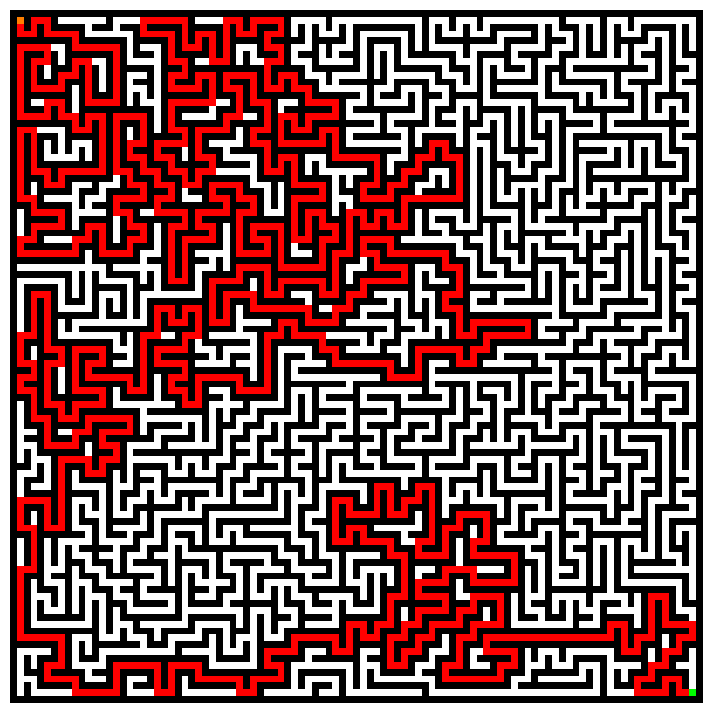

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.setrecursionlimit(3000)

def create_laberinto(size):
    # Initialize the grid with walls
    laberinto = [['#' for _ in range(size)] for _ in range(size)]

    # List of positions to visit (stack)
    stack = []

    # Start in a random cell
    start_x, start_y = 1, 1
    laberinto[start_y][start_x] = ' '
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        directions = [(0, 2), (2, 0), (0, -2), (-2, 0)]  # Right, Down, Left, Up
        random.shuffle(directions)  # Shuffle directions

        # Find a new neighbor
        found = False
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 1 <= nx < size - 1 and 1 <= ny < size - 1 and laberinto[ny][nx] == '#':
                laberinto[y + dy // 2][x + dx // 2] = ' '  # Carve passage
                laberinto[ny][nx] = ' '  # Carve new cell
                stack.append((nx, ny))  # Add the new cell to the stack
                found = True
                break

        if not found:
            stack.pop()  # Backtrack if there are no more neighbors

    return laberinto

def plot_laberinto(laberinto, path=[]):
    # Convert the maze to a numeric array
    laberinto_array = np.array(laberinto)
    laberinto_numeric = np.where(laberinto_array == '#', 1, 0)  # 1 for walls, 0 for passages

    # Create a color map
    color_map = np.zeros((*laberinto_numeric.shape, 3))  # Initialize an RGB color map

    # Assign colors
    color_map[laberinto_numeric == 1] = [0, 0, 0]  # Black for walls
    color_map[laberinto_numeric == 0] = [1, 1, 1]  # White for passages
    color_map[1, 1] = [1, 0.5, 0]  # Orange for start
    color_map[99, 99] = [0, 1, 0]  # Green for end

    # Mark the path, ensuring that start and end colors do not change
    for (x, y) in path:
        if (x, y) != (1, 1) and (x, y) != (99, 99):  # Avoid changing start and end colors
            color_map[y, x] = [1, 0, 0]  # Red for path

    # Adjust figure size
    plt.figure(figsize=(9, 9))  # Set figure size to 10x10 inches
    plt.imshow(color_map)  # Display the maze
    plt.axis('off')  # Hide axes
    plt.show()  # Show the image

def depth_first_search(laberinto, x, y, end, path):
    # If we reach the end
    if (x, y) == end:
        path.append((x, y))
        return True

    # Mark the cell as visited
    if laberinto[y][x] == ' ':
        path.append((x, y))  # Add to the path
        laberinto[y][x] = '.'  # Mark as visited

        # Fixed directions to move (right, down, left, up)
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Keep this order fixed

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            # Check if the cell is within the maze and unvisited
            if 0 <= nx < len(laberinto[0]) and 0 <= ny < len(laberinto) and laberinto[ny][nx] in (' ', end):
                if depth_first_search(laberinto, nx, ny, end, path):
                    return True

        # Unmark if no path is found
        path.pop()
        laberinto[y][x] = ' '  # Unmark to allow other paths

    return False

# Create a 101x101 maze
size = 101
laberinto = create_laberinto(size)

# Define the start and end points
start = (1, 1)
end = (99, 99)

# Initialize the path list
path = []

# Perform depth-first search
depth_first_search(laberinto, start[0], start[1], end, path)

# Plot the maze with the found path
plot_laberinto(laberinto, path)



# 2. Modifica la matriz de movimientos para permitir saltos en diagonal y añadir más muros (de forma aleatoria) en el interior, olvidar un porcentaje de puntos por dónde se ha pasado.


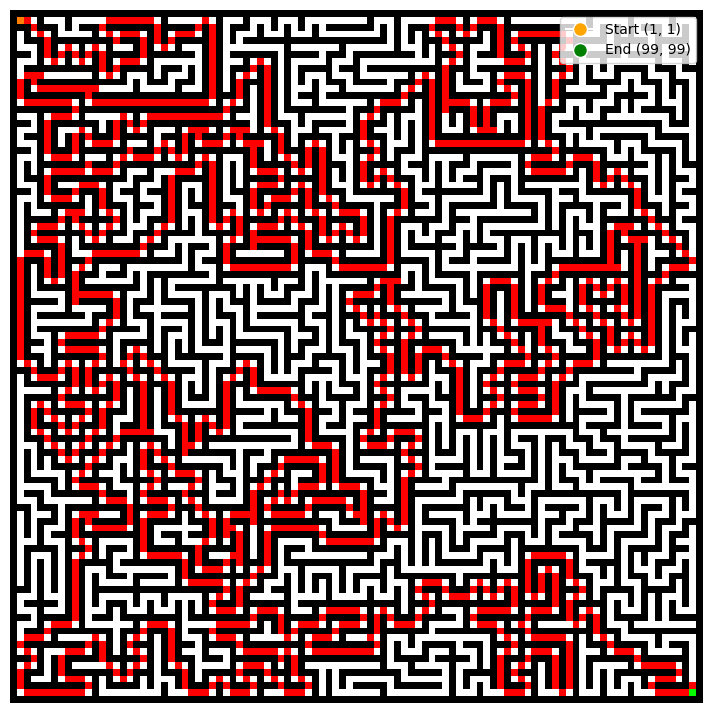

In [35]:
import random
import matplotlib.pyplot as plt
import numpy as np

def create_maze(size):
    # Initialize the maze with walls
    maze = [['#' for _ in range(size)] for _ in range(size)]

    # List of positions to visit (stack)
    stack = []

    # Start at a random cell
    start_x, start_y = 1, 1
    maze[start_y][start_x] = ' '  # Mark the starting cell as a passage
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        # Movement directions: limiting to orthogonal movements
        directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]  # Only orthogonal movements
        random.shuffle(directions)  # Shuffle directions

        # Find a new neighbor
        found = False
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 1 <= nx < size - 1 and 1 <= ny < size - 1 and maze[ny][nx] == '#':
                maze[y + dy // 2][x + dx // 2] = ' '  # Carve a passage
                maze[ny][nx] = ' '  # Carve the new cell
                stack.append((nx, ny))  # Add the new cell to the stack
                found = True
                break

        if not found:
            stack.pop()  # Backtrack if no more neighbors

    return maze

def plot_maze(maze, path=[]):
    maze_array = np.array(maze)
    maze_numeric = np.where(maze_array == '#', 1, 0)

    color_map = np.zeros((*maze_numeric.shape, 3))

    color_map[maze_numeric == 1] = [0, 0, 0]  # Walls in black
    color_map[maze_numeric == 0] = [1, 1, 1]  # Passages in white
    color_map[1, 1] = [1, 0.5, 0]  # Start (orange)
    color_map[99, 99] = [0, 1, 0]  # End (green)

    # Change the path color from yellow to red
    for (x, y) in path:
        if (x, y) != (1, 1) and (x, y) != (99, 99):
            color_map[y, x] = [1, 0, 0]  # Path in red

    plt.figure(figsize=(9, 9))
    plt.imshow(color_map)
    plt.axis('off')

    # Add legend on the right
    start_marker = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Start (1, 1)')
    end_marker = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='End (99, 99)')
    plt.legend(handles=[start_marker, end_marker], loc='upper right')

    plt.show()

def depth_first_search(maze, x, y, end, path, visited):
    if (x, y) == end:
        path.append((x, y))
        return True

    if maze[y][x] == ' ' and (x, y) not in visited:
        path.append((x, y))
        visited.add((x, y))  # Mark as visited

        # Fixed directions for movement (diagonals first)
        directions = [(1, 1), (1, -1), (-1, 1), (-1, -1), (0, 1), (1, 0), (0, -1), (-1, 0)]

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and maze[ny][nx] in (' ', end):
                if depth_first_search(maze, nx, ny, end, path, visited):
                    return True

        path.pop()
        maze[y][x] = ' '  # Unmark to allow other paths

    return False

# Create a maze of 101x101
size = 101
maze = create_maze(size)

# Define the start and end points
start = (1, 1)
end = (99, 99)

# Initialize the path list and visited set
path = []
visited = set()  # Track visited cells

# Perform depth-first search
depth_first_search(maze, start[0], start[1], end, path, visited)

# Plot the maze with the found path
plot_maze(maze, path)


# 3. Recorrido en abanico iterativo.


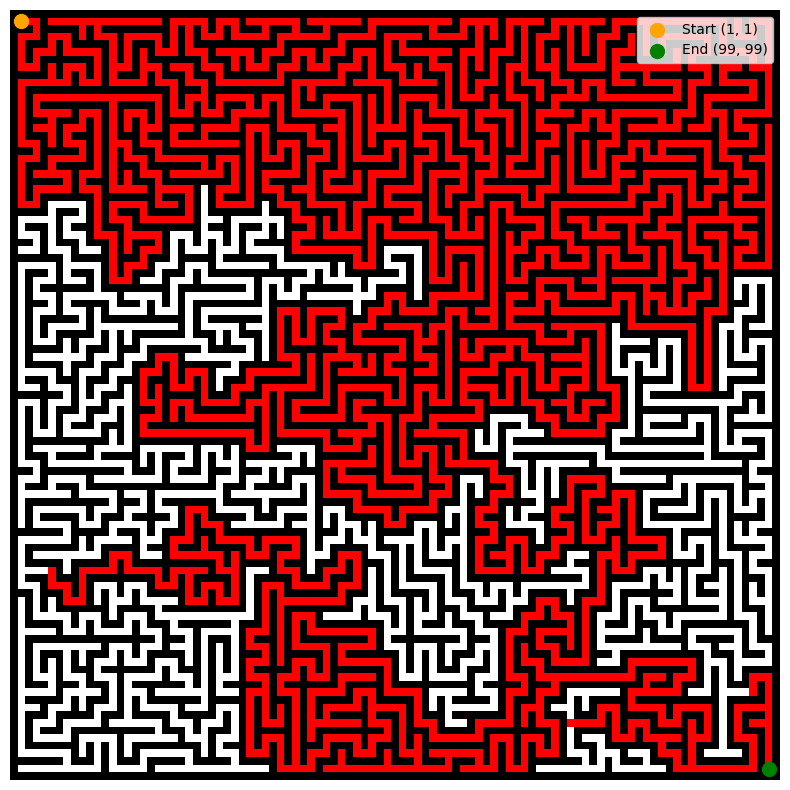

In [36]:
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def create_maze(size):
    # Initialize the maze with walls
    maze = [['#' for _ in range(size)] for _ in range(size)]
    stack = []
    start_x, start_y = 1, 1
    maze[start_y][start_x] = ' '  # Set the starting point as a passage
    stack.append((start_x, start_y))

    while stack:
        x, y = stack[-1]
        # Define possible movement directions (up, down, left, right)
        directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]
        random.shuffle(directions)  # Shuffle directions to ensure randomness

        found = False
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            # Check if the next cell is within bounds and is a wall
            if 1 <= nx < size - 1 and 1 <= ny < size - 1 and maze[ny][nx] == '#':
                maze[y + dy // 2][x + dx // 2] = ' '  # Carve passage between cells
                maze[ny][nx] = ' '  # Carve the new cell
                stack.append((nx, ny))  # Add new cell to stack
                found = True
                break

        if not found:
            stack.pop()  # Backtrack if no unvisited neighbors are found

    return maze

def plot_maze(maze, path=[]):
    # Convert maze to a numpy array for easier manipulation
    maze_array = np.array(maze)
    maze_numeric = np.where(maze_array == '#', 1, 0)  # Convert walls and passages to numeric values

    # Create a color map for plotting
    color_map = np.zeros((*maze_numeric.shape, 3))
    color_map[maze_numeric == 1] = [0, 0, 0]  # Walls in black
    color_map[maze_numeric == 0] = [1, 1, 1]  # Passages in white
    color_map[1, 1] = [1, 0.5, 0]  # Start point in orange
    color_map[99, 99] = [0, 1, 0]  # End point in green

    # Color the path found in the maze
    for (x, y) in path:
        if (x, y) != (1, 1) and (x, y) != (99, 99):
            color_map[y, x] = [1, 0, 0]  # Path in red

    plt.figure(figsize=(10, 10))  # Set the figure size
    plt.imshow(color_map)  # Display the maze
    plt.axis('off')  # Turn off the axis

    # Add legend
    plt.scatter(1, 1, color='orange', label='Start (1, 1)', s=100)  # Start point
    plt.scatter(99, 99, color='green', label='End (99, 99)', s=100)  # End point
    plt.legend(loc='upper right')  # Move the legend to the upper right

    plt.show()

def iterative_fan_search(maze, start, end):
    queue = deque([start])  # Use a queue for the fan search
    path = []
    visited = set()  # To avoid cycles

    while queue:
        x, y = queue.popleft()  # Remove the first element from the queue

        if (x, y) == end:
            path.append((x, y))  # Append the end point to the path
            return path

        if (x, y) not in visited:
            visited.add((x, y))  # Mark the cell as visited
            path.append((x, y))  # Add to the path

            # Directions for moving in the fan search (right, down, left, up)
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < len(maze[0]) and 0 <= ny < len(maze) and maze[ny][nx] in (' ', end):
                    queue.append((nx, ny))  # Add to the queue

    return []  # Return an empty path if no path exists

# Create a maze of size 101x101
size = 101
maze = create_maze(size)

# Define the start and end points
start = (1, 1)
end = (99, 99)

path = iterative_fan_search(maze, start, end)# Perform the fan search
plot_maze(maze, path)# Plot the maze with the found path
